## Exercise: Pandas & NumPy with Student Performance Dataset
## Exercise: Pandas & NumPy with Student Performance Dataset

You are provided with three separate datasets, all originally derived from a single dataset. However, these datasets have undergone slight modifications through different processes. Your task is to analyze the datasets, identify the differences, and correctly merge them back together.

**Important Notes**:
- Some column names have been changed and need to be translated back.
- Certain categorical variables have altered values (e.g., some categories have been renamed).
- Check the distribution of numerical variables, as there may be discrepancies.
- Missing values are present in multiple columns and need to be imputed appropriately. Justify your choice of imputation method.
- Some columns have been stored in different data types (e.g., numbers as strings). Ensure that data types are correct before merging the datasets.

Your Task:
1. Load all three datasets into Python.
2. Identify differences and discrepancies between the datasets.
3. Reconstruct the original dataset by:
    - Adjusting column names and data types.
    - Correctly merging the datasets.
    - Handling missing values (imputation) and justifying your chosen method.
4. Save the final dataset as Merged_StudentData.csv.
5. Perform hypothesis tests to analyze relationships between the following variables: `Sleep_Hours`, `Exam_Score`, `Internet_Access`, `Hours_Studied`, and `Tutoring_Sessions`.

In [77]:
import pandas as pd

df1 = pd.read_csv("Student Data Part 1 mv.csv")
df2 = pd.read_csv("Student Data Part 2 mv.csv")
df3 = pd.read_csv("Student Data Part 3 mv.csv")

df1

,Student_ID,Study_Hours,Attendance,Rest_Hours,Parental_Involvement,Access_to_Resources
0,1,23,84,8.0,Low,High
1,2,19,64,9.0,Low,Medium
2,3,24,98,8.0,Medium,Medium
3,4,29,89,9.0,Low,Medium
4,5,19,92,7.0,Medium,Medium
...,...,...,...,...,...,...
6602,6603,25,69,8.0,High,Medium
6603,6604,23,76,9.0,High,Medium
6604,6605,20,90,7.0,Medium,Low
6605,6606,10,86,7.0,High,High


In [37]:
df2

,Unnamed: 0,Student_ID,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type
0,743,744,Available,1.0,Medium,Medium,Public
1,5551,5552,Available,2.0,Low,High,Public
2,3442,3443,Available,1.0,Medium,Medium,Public
3,6571,6572,Available,0.0,Low,Low,Public
4,4204,4205,Available,2.0,High,Medium,Public
...,...,...,...,...,...,...,...
5611,5786,5787,Available,4.0,Medium,Medium,Public
5612,1312,1313,Available,0.0,Medium,Medium,Public
5613,3448,3449,Available,1.0,Low,Medium,Public
5614,3812,3813,Unavailable,3.0,High,Medium,Private


In [38]:
df3

,Student_ID,Final_Score,Parental_Education_Level,Distance_from_Home,Gender
0,1,65.0,High School,Close,Male
1,2,59.0,College,Medium,Female
2,3,72.0,Postgraduate,Close,Male
3,4,69.0,High School,Medium,Male
4,5,68.0,College,Close,Female
...,...,...,...,...,...
6602,6603,66.0,High School,Close,Female
6603,6604,67.0,High School,Close,Female
6604,6605,66.0,Postgraduate,Close,Female
6605,6606,66.0,High School,Distant,Female


2. Identify differences and discrepancies between the datasets.

In [39]:
df1.head(5)
df2.head(5)
df3.head(5)

df1.tail(5)
df2.tail(5)
df2.tail(5)

df1.info()
df2.info()
df3.info()

df1.describe()	
df2.describe()	
df3.describe()	

df1.shape
df2.shape
df3.shape

df1.dtypes
df2.dtypes
df3.dtypes

df1.nunique
df2.nunique
df3.nunique

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ID            6607 non-null   int64  
 1   Study_Hours           6607 non-null   int64  
 2   Attendance            6607 non-null   int64  
 3   Rest_Hours            6277 non-null   float64
 4   Parental_Involvement  6607 non-null   object 
 5   Access_to_Resources   6607 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 309.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5616 non-null   int64  
 1   Student_ID         5616 non-null   int64  
 2   Internet_Access    5335 non-null   object 
 3   Tutoring_Sessions  5335 non-null   float64
 4   Family_Income      5616

<bound method DataFrame.nunique of       Student_ID  Final_Score Parental_Education_Level Distance_from_Home  \
0              1         65.0              High School              Close   
1              2         59.0                  College             Medium   
2              3         72.0             Postgraduate              Close   
3              4         69.0              High School             Medium   
4              5         68.0                  College              Close   
...          ...          ...                      ...                ...   
6602        6603         66.0              High School              Close   
6603        6604         67.0              High School              Close   
6604        6605         66.0             Postgraduate              Close   
6605        6606         66.0              High School            Distant   
6606        6607         62.0             Postgraduate              Close   

      Gender  
0       Male  
1     Fema

3.  Reconstruct the original dataset by:
    - Adjusting column names and data types.
    - Correctly merging the datasets.
    - Handling missing values (imputation) and justifying your chosen method.

In [40]:
df2 = df2.drop(columns=["Unnamed: 0"], errors="ignore")


print(df1.dtypes)
print(df2.dtypes)
print(df3.dtypes)


Student_ID                int64
Study_Hours               int64
Attendance                int64
Rest_Hours              float64
Parental_Involvement     object
Access_to_Resources      object
dtype: object
Student_ID             int64
Internet_Access       object
Tutoring_Sessions    float64
Family_Income         object
Teacher_Quality       object
School_Type           object
dtype: object
Student_ID                    int64
Final_Score                 float64
Parental_Education_Level     object
Distance_from_Home           object
Gender                       object
dtype: object


In [41]:
merged_df = pd.merge(df1, df2, on="Student_ID", how="outer")
merged_df = pd.merge(merged_df, df3, on="Student_ID", how="outer")

recode_dict = {
    "Parental_Involvement": {"Low": 1, "Medium": 2, "High": 3},
    "Access_to_Resources": {"Low": 1, "Medium": 2, "High": 3},
    "Internet_Access": {"Unavailable": 0, "Available": 1},
    "Family_Income": {"Low": 1, "Medium": 2, "High": 3},
    "Teacher_Quality": {"Low": 1, "Medium": 2, "High": 3},
    "School_Type": {"Public": 0, "Private": 1},
    "Parental_Education_Level": {"High School": 1, "College": 2, "Postgraduate": 3},
    "Distance_from_Home": {"Close": 1, "Medium": 2, "Distant": 3},
    "Gender": {"Male": 0, "Female": 1}}

merged_df.replace(recode_dict, inplace=True)
merged_df = merged_df.apply(pd.to_numeric, errors='ignore')
print(merged_df.head())


   Student_ID  Study_Hours  Attendance  Rest_Hours  Parental_Involvement  \
0           1           23          84         8.0                     1   
1           2           19          64         9.0                     1   
2           3           24          98         8.0                     2   
3           4           29          89         9.0                     1   
4           5           19          92         7.0                     2   

   Access_to_Resources  Internet_Access  Tutoring_Sessions  Family_Income  \
0                    3              1.0                0.0            1.0   
1                    2              1.0                2.0            2.0   
2                    2              1.0                2.0            2.0   
3                    2              1.0                1.0            2.0   
4                    2              NaN                NaN            NaN   

   Teacher_Quality  School_Type  Final_Score  Parental_Education_Level  \
0     

/tmp/ipykernel_2187067/3139995918.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df.replace(recode_dict, inplace=True)
/tmp/ipykernel_2187067/3139995918.py:16: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  merged_df = merged_df.apply(pd.to_numeric, errors='ignore')


In [42]:
print(merged_df.isnull().sum())
missing_percentage = (merged_df.isnull().sum() / len(merged_df)) * 100
print(missing_percentage)

Student_ID                     0
Study_Hours                    0
Attendance                     0
Rest_Hours                   330
Parental_Involvement           0
Access_to_Resources            0
Internet_Access             1272
Tutoring_Sessions           1272
Family_Income                991
Teacher_Quality             1057
School_Type                  991
Final_Score                  330
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
dtype: int64
Student_ID                   0.000000
Study_Hours                  0.000000
Attendance                   0.000000
Rest_Hours                   4.994703
Parental_Involvement         0.000000
Access_to_Resources          0.000000
Internet_Access             19.252308
Tutoring_Sessions           19.252308
Family_Income               14.999243
Teacher_Quality             15.998184
School_Type                 14.999243
Final_Score                  4.994703
Parental_Education_Level     1.36219

Handling missing values (imputation) and justifying your chosen method.

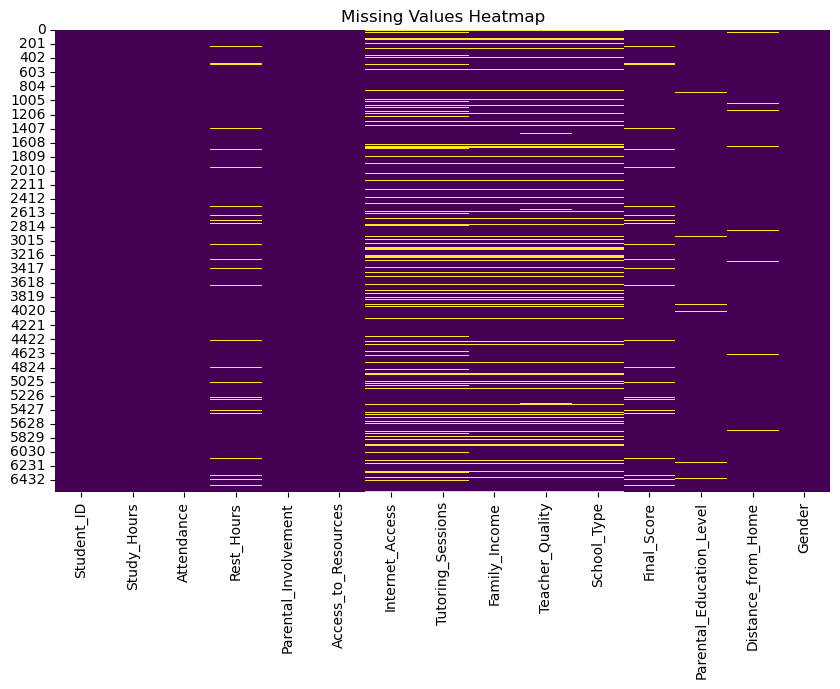

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(merged_df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [44]:
numeric_cols = merged_df.select_dtypes(include=["number"]).columns
print(numeric_cols)
print(merged_df.dtypes)


Index(['Student_ID', 'Study_Hours', 'Attendance', 'Rest_Hours',
       'Parental_Involvement', 'Access_to_Resources', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Final_Score', 'Parental_Education_Level', 'Distance_from_Home',
       'Gender'],
      dtype='object')
Student_ID                    int64
Study_Hours                   int64
Attendance                    int64
Rest_Hours                  float64
Parental_Involvement          int64
Access_to_Resources           int64
Internet_Access             float64
Tutoring_Sessions           float64
Family_Income               float64
Teacher_Quality             float64
School_Type                 float64
Final_Score                 float64
Parental_Education_Level    float64
Distance_from_Home          float64
Gender                        int64
dtype: object


In [48]:
print(merged_df["Internet_Access"].unique())
print(merged_df["Distance_from_Home"].unique())

merged_df["Distance_from_Home"].head
merged_df["Internet_Access"].head

import numpy as np


[ 1. nan  0.]
[ 1.  2.  3. nan]


In [53]:
merged_df
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

knn_imputer = KNNImputer(n_neighbors=5)
from sklearn.linear_model import BayesianRidge
iterative_imputer = IterativeImputer(estimator=BayesianRidge(), random_state=42)

merged_df["Rest_Hours"] = merged_df["Rest_Hours"].fillna(merged_df["Rest_Hours"].median())
merged_df["Distance_from_Home"] = merged_df["Distance_from_Home"].fillna(merged_df["Distance_from_Home"].median())

merged_df[["Tutoring_Sessions", "Final_Score"]] = knn_imputer.fit_transform(merged_df[["Tutoring_Sessions", "Final_Score"]])

merged_df[["Family_Income"]] = iterative_imputer.fit_transform(merged_df[["Family_Income"]])

for col in ["Internet_Access", "Teacher_Quality", "School_Type", "Parental_Education_Level"]:
    merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)

print(merged_df.isnull().sum())



Student_ID                  0
Study_Hours                 0
Attendance                  0
Rest_Hours                  0
Parental_Involvement        0
Access_to_Resources         0
Internet_Access             0
Tutoring_Sessions           0
Family_Income               0
Teacher_Quality             0
School_Type                 0
Final_Score                 0
Parental_Education_Level    0
Distance_from_Home          0
Gender                      0
dtype: int64


/tmp/ipykernel_2187067/2815676292.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)


### Hypotheses testing

Hypothesis 1: There is a positive correlation between the number of hours of sleep (Sleep_Hours) and the exam grade (Exam_Score).
- Remove potential outliers (e.g. students who sleep extremely little or extremely much, i.e. top and bottom 3 %).
- First check whether the variables are normally distributed. If not, apply Spearman correlation.

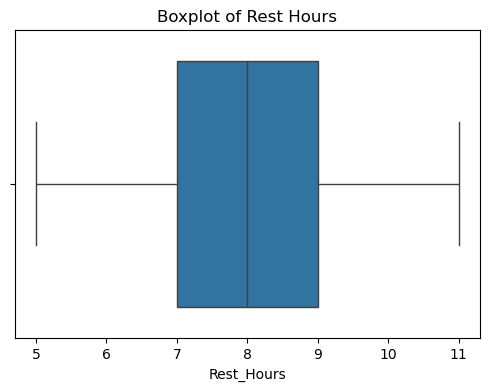

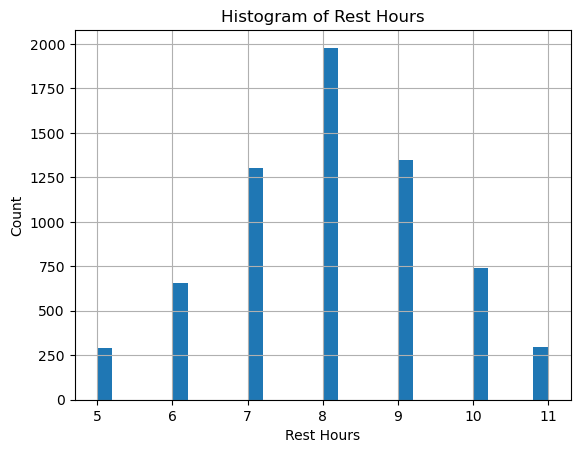

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x=merged_df["Rest_Hours"])
plt.title("Boxplot of Rest Hours")
plt.show()

merged_df["Rest_Hours"].hist(bins=30)
plt.title("Histogram of Rest Hours")
plt.xlabel("Rest Hours")
plt.ylabel("Count")
plt.show()

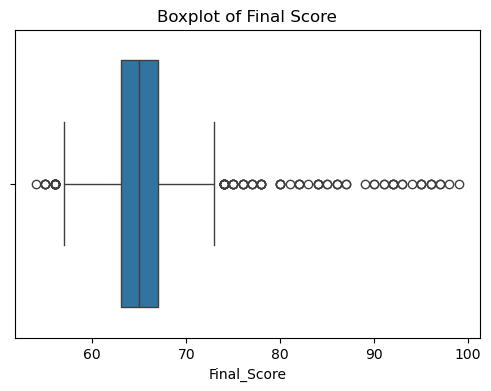

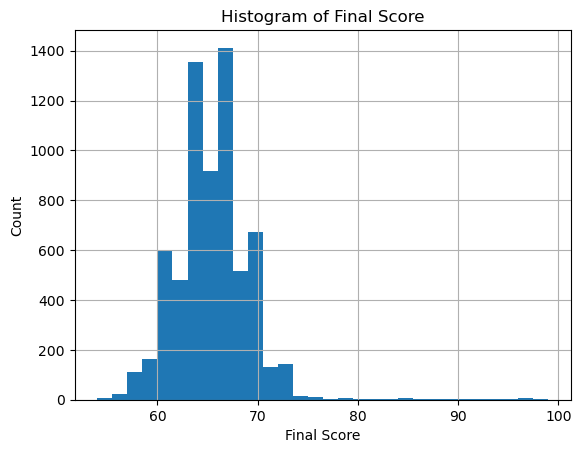

In [58]:
plt.figure(figsize=(6,4))
sns.boxplot(x=merged_df["Final_Score"])
plt.title("Boxplot of Final Score")
plt.show()

merged_df["Final_Score"].hist(bins=30)
plt.title("Histogram of Final Score")
plt.xlabel("Final Score")
plt.ylabel("Count")
plt.show()

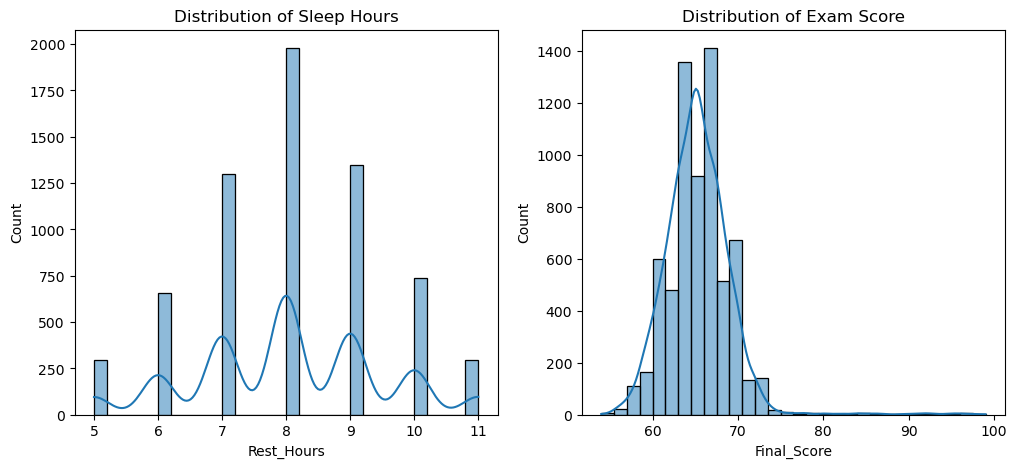

In [59]:
import scipy.stats as stats

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(merged_df["Rest_Hours"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Sleep Hours")

sns.histplot(merged_df["Final_Score"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Exam Score")

plt.show()

In [60]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(merged_df["Rest_Hours"], merged_df["Final_Score"])
print(f"Pearson Correlation: {corr}, p={p_value}")

Pearson Correlation: -0.013715022952645338, p=0.2650021778994329


almost no correlation + not statistically significant 

In [62]:
lower_bound = np.percentile(merged_df["Rest_Hours"], 3)
upper_bound = np.percentile(merged_df["Rest_Hours"], 97)

filtered_df = merged_df[(merged_df["Rest_Hours"] >= lower_bound) & (merged_df["Rest_Hours"] <= upper_bound)]

print("Original size:", merged_df.shape)
print("Filtered size:", filtered_df.shape)


Original size: (6607, 15)
Filtered size: (6607, 15)


In [67]:
lower_bound_fs = np.percentile(merged_df["Final_Score"], 3)
upper_bound_fs = np.percentile(merged_df["Final_Score"], 97)

filtered_df = filtered_df[(filtered_df["Final_Score"] >= lower_bound_fs) & (filtered_df["Final_Score"] <= upper_bound_fs)]

print("Original size:", merged_df.shape)
print("Filtered size:", filtered_df.shape)

Original size: (6607, 15)
Filtered size: (6354, 15)


Hypothesis 2: Students with Internet access (Internet_Access) spend more time studying (Hours_Studied) than students without Internet access.
- Create a boxplot for visualization and check for outliers.
- Remove extreme values according to boxplot definition.

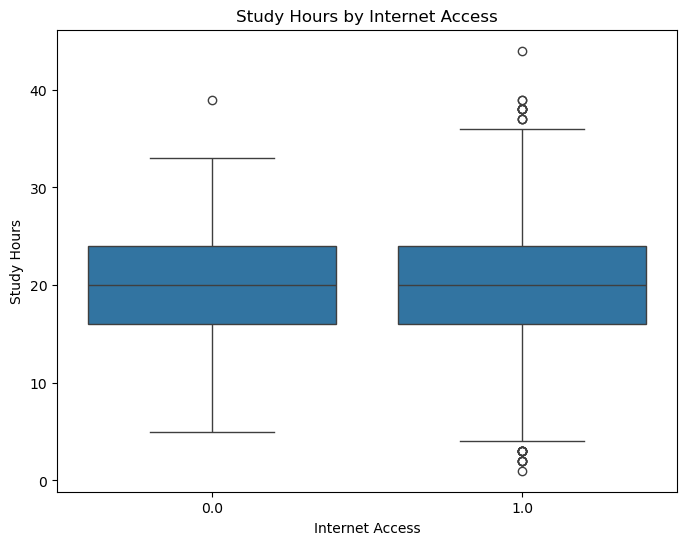

In [68]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Internet_Access", y="Study_Hours", data=filtered_df)
plt.title("Study Hours by Internet Access")
plt.xlabel("Internet Access")
plt.ylabel("Study Hours")
plt.show()

In [70]:
Q1 = filtered_df["Study_Hours"].quantile(0.25)
Q3 = filtered_df["Study_Hours"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = filtered_df[(filtered_df["Study_Hours"] >= lower_bound) & (filtered_df["Study_Hours"] <= upper_bound)]
print("New dataset size after removing outliers:", filtered_df.shape)


New dataset size after removing outliers: (6327, 15)


Hypothesis 3: Students who receive tutoring (Tutoring_Sessions) have higher exam grades than students without tutoring.

In [76]:
merged_df['Tutoring_Sessions'].dtype

merged_df['Tutoring_Sessions'].value_counts()

merged_df['Tutoring_Group'] = merged_df['Tutoring_Sessions'].apply(lambda x: 'Tutored' if x > 0 else 'Not_Tutored')
from scipy.stats import ttest_ind

tutored = merged_df[merged_df['Tutoring_Group'] == 'Tutored']['Final_Score']
not_tutored = merged_df[merged_df['Tutoring_Group'] == 'Not_Tutored']['Final_Score']

t_stat, p_value = ttest_ind(tutored, not_tutored, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 7.308204651105726, P-value: 4.0139400230763394e-13


significant difference between the two groups 